# Example Queries

<br>

### Imports

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from NGDataPortal import Wrapper, stream_to_id_map

<br>

### Examples

We'll start by initialising the API wrapper and assigning its stream as embedded wind anf solar forecasts

In [53]:
stream = 'embedded-wind-and-solar-forecasts'
wrapper = Wrapper(stream)

df = wrapper.query_API()

df.head()

,_id,DATE_GMT,TIME_GMT,SETTLEMENT_DATE,SETTLEMENT_PERIOD,EMBEDDED_WIND_FORECAST,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_FORECAST,EMBEDDED_SOLAR_CAPACITY
0,1,20200502,2130,2020-05-02T00:00:00,45,408,6527,0,13080
1,2,20200502,2200,2020-05-02T00:00:00,46,386,6527,0,13080
2,3,20200502,2230,2020-05-02T00:00:00,47,386,6527,0,13080
3,4,20200502,2300,2020-05-02T00:00:00,48,357,6527,0,13080
4,5,20200502,2330,2020-05-03T00:00:00,1,357,6527,0,13082


<br>

We can reassign the stream used by the wrapper easily

In [54]:
wrapper.assign_stream('system-frequency-data')

df = wrapper.query_API()

df.head()

,_id,dtm,f
0,1,2019-12-01T00:00:00,50.118
1,2,2019-12-01T00:00:01,50.117
2,3,2019-12-01T00:00:02,50.111
3,4,2019-12-01T00:00:03,50.100
4,5,2019-12-01T00:00:04,50.089


<br>

And do more complex queries with date ranges

In [55]:
start_date = '2019-12-01T00:00:00'
end_date = '2019-12-02T00:00:00'
dt_col = 'dtm'

df = wrapper.query_API(start_date=start_date, end_date=end_date, dt_col=dt_col)

df.head()

,_id,_full_text,dtm,f
0,1,"'-01':3 '-12':2 '00':5,6 '2019':1 '50.118':7 '...",2019-12-01T00:00:00,50.118
1,2,'-01':3 '-12':2 '00':5 '01':6 '2019':1 '50.117...,2019-12-01T00:00:01,50.117
2,3,'-01':3 '-12':2 '00':5 '02':6 '2019':1 '50.111...,2019-12-01T00:00:02,50.111
3,4,'-01':3 '-12':2 '00':5 '03':6 '2019':1 '50.1':...,2019-12-01T00:00:03,50.1
4,5,'-01':3 '-12':2 '00':5 '04':6 '2019':1 '50.089...,2019-12-01T00:00:04,50.089


<br>

We can quickly go from query response data to visualisations

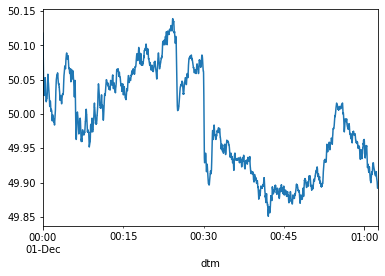

In [57]:
s_freq = (df
          .assign(dtm=pd.to_datetime(df['dtm'], utc=True))
          .set_index('dtm')
          ['f']
          .astype(float)
         )

s_freq.plot()

<br>

And return the raw data when debugging or exploring metadata

In [58]:
start_date = '2019-12-01T00:00:00'
end_date = '2019-12-01T00:00:05'

r = wrapper.query_API(start_date=start_date, end_date=end_date, dt_col=dt_col, return_raw=True)

r.content

b'{"help": "https://national-grid-admin.ckan.io/api/3/action/help_show?name=datastore_search_sql", "success": true, "result": {"records": [{"_id": 1, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5,6 \'2019\':1 \'50.118\':7 \'t00\':4", "dtm": "2019-12-01T00:00:00", "f": "50.118"}, {"_id": 2, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5 \'01\':6 \'2019\':1 \'50.117\':7 \'t00\':4", "dtm": "2019-12-01T00:00:01", "f": "50.117"}, {"_id": 3, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5 \'02\':6 \'2019\':1 \'50.111\':7 \'t00\':4", "dtm": "2019-12-01T00:00:02", "f": "50.111"}, {"_id": 4, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5 \'03\':6 \'2019\':1 \'50.1\':7 \'t00\':4", "dtm": "2019-12-01T00:00:03", "f": "50.1"}, {"_id": 5, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5 \'04\':6 \'2019\':1 \'50.089\':7 \'t00\':4", "dtm": "2019-12-01T00:00:04", "f": "50.089"}, {"_id": 6, "_full_text": "\'-01\':3 \'-12\':2 \'00\':5 \'05\':6 \'2019\':1 \'50.076\':7 \'t00\':4", "dtm": "2019-12-01T00:00:05", "f": "50.076